In [5]:
# opens SQL query directly in Python, rather than open from CSV
# import libraries
# pyodbc for ODBC connection
import pyodbc
# pandas for 'excel' like sheets
import pandas as pd
# datetime for date computer date

# if you do not use windows authentication, use the following instead:
# databaseConnection = 'DRIVER={SQL Server}; SERVER=ServerName; Database=DatbaseName; UID=UserId; PWD=password;'
connection = pyodbc.connect('DRIVER={SQL Server};SERVER=WINDOWS-A6S01I2\SQLEXPRESS;DATABASE=City_of_Scottsdale;Trusted_Connection=yes;')
cursor = connection.cursor()

# SQL query for testing if a series of three

Solicitations_Query = '''
select 
	year(A.[CloseDate]) as _Year_
	,B.EmergencyPurchase
	,C.PublicBid
	,D.SoleSource
	,E.OtherGovernmentContract
	,F.RequestForProposal
	,G.RequestForQuotation
	,H.PricingAgreement
	,I.InformalRequestForProposal
	,J.StatementofQualifications
	,K.OffertoPurchase
	,L.SoleSourceExclusionofAlternates
	,M.RequestForQualifications
	,N.RequestForInformation

from [dbo].[fs_Solicitations$] as A
left join (select
			year([CloseDate]) as _Year_
			,count(*) as EmergencyPurchase
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Emergency Purchase'
			group by year([CloseDate])) as B on B._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as PublicBid
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Public Bid'
			group by year([CloseDate])) as C on C._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as SoleSource
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Sole Source'
			group by year([CloseDate])) as D on D._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as OtherGovernmentContract
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Other Government Contract'
			group by year([CloseDate])) as E on E._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForProposal
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Proposal'
			group by year([CloseDate])) as F on F._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForQuotation
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Quotation'
			group by year([CloseDate])) as G on G._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as PricingAgreement
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Pricing Agreement'
			group by year([CloseDate])) as H on H._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as InformalRequestForProposal
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Informal Request For Proposal'
			group by year([CloseDate])) as I on I._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as StatementofQualifications
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Statement of Qualifications'
			group by year([CloseDate])) as J on J._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as OffertoPurchase
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Offer to Purchase'
			group by year([CloseDate])) as K on K._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as SoleSourceExclusionofAlternates
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Sole Source Exclusion of Alternates'
			group by year([CloseDate])) as L on L._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForQualifications
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Qualifications'
			group by year([CloseDate])) as M on M._Year_ = year(A.[CloseDate])
left join (select
			year([CloseDate]) as _Year_
			,count(*) as RequestForInformation
			from [dbo].[fs_Solicitations$]
			where [SoliciationType] like 'Request For Information'
			group by year([CloseDate])) as N on N._Year_ = year(A.[CloseDate])
			
group by year([CloseDate]), B.EmergencyPurchase, C.PublicBid, D.SoleSource, E.OtherGovernmentContract
	,F.RequestForProposal ,G.RequestForQuotation ,H.PricingAgreement ,I.InformalRequestForProposal
	,J.StatementofQualifications ,K.OffertoPurchase ,L.SoleSourceExclusionofAlternates ,M.RequestForQualifications
	,N.RequestForInformation
order by year(A.[CloseDate]) desc

  '''
# save the sql query to a pandas dataframe
Solicitaion_data = pd.read_sql(Solicitations_Query, connection)
connection.close()
Solicitaion_data.head()

,_Year_,EmergencyPurchase,PublicBid,SoleSource,OtherGovernmentContract,RequestForProposal,RequestForQuotation,PricingAgreement,InformalRequestForProposal,StatementofQualifications,OffertoPurchase,SoleSourceExclusionofAlternates,RequestForQualifications,RequestForInformation
0,2018,NaN,18.0,NaN,NaN,24,NaN,3.0,2.0,12.0,3.0,NaN,4.0,NaN
1,2017,NaN,25.0,NaN,NaN,37,NaN,2.0,1.0,10.0,1.0,NaN,1.0,NaN
2,2016,NaN,31.0,NaN,2.0,37,NaN,3.0,1.0,11.0,2.0,NaN,1.0,NaN
3,2015,NaN,29.0,NaN,3.0,35,NaN,8.0,NaN,12.0,2.0,NaN,2.0,1.0
4,2014,NaN,38.0,NaN,NaN,31,NaN,3.0,4.0,16.0,2.0,NaN,NaN,NaN


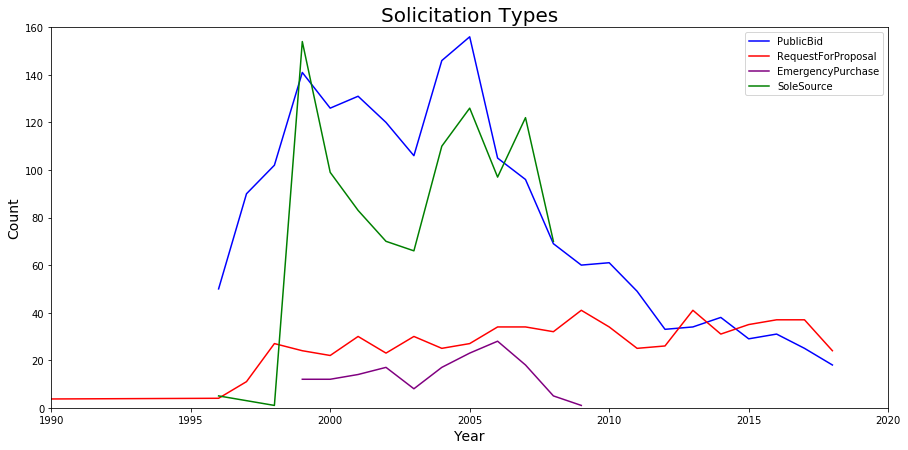

In [4]:
import numpy as np
import matplotlib.pyplot as plt


plt.rcParams["figure.figsize"] = [15, 7]    #sets the ploted size
plt.title("Solicitation Types",fontsize=20)
plt.xlabel("Year",fontsize=14)
plt.ylabel("Count",fontsize=14)

y1 = Solicitaion_data.PublicBid
y2 = Solicitaion_data.RequestForProposal
y3 = Solicitaion_data.EmergencyPurchase
y4 = Solicitaion_data.SoleSource

x = Solicitaion_data._Year_ 

plt.ylim(0, 160)
plt.xlim(1990,2020)

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.plot(x, y3, color='purple')
plt.plot(x, y4, color='green')
plt.legend()

In [2]:
# x = Solicitaion_data.groupby(['_Year_']).sum()
Solicitaion_data


,_Year_,EmergencyPurchase,PublicBid,SoleSource,OtherGovernmentContract,RequestForProposal,RequestForQuotation,PricingAgreement,InformalRequestForProposal,StatementofQualifications,OffertoPurchase,SoleSourceExclusionofAlternates,RequestForQualifications,RequestForInformation
0,2018,NaN,18.0,NaN,NaN,24,NaN,3.0,2.0,12.0,3.0,NaN,4.0,NaN
1,2017,NaN,25.0,NaN,NaN,37,NaN,2.0,1.0,10.0,1.0,NaN,1.0,NaN
2,2016,NaN,31.0,NaN,2.0,37,NaN,3.0,1.0,11.0,2.0,NaN,1.0,NaN
3,2015,NaN,29.0,NaN,3.0,35,NaN,8.0,NaN,12.0,2.0,NaN,2.0,1.0
4,2014,NaN,38.0,NaN,NaN,31,NaN,3.0,4.0,16.0,2.0,NaN,NaN,NaN
5,2013,NaN,34.0,NaN,12.0,41,1.0,6.0,1.0,5.0,NaN,NaN,2.0,NaN
6,2012,NaN,33.0,NaN,7.0,26,NaN,3.0,4.0,10.0,NaN,NaN,3.0,NaN
7,2011,NaN,49.0,NaN,NaN,25,3.0,13.0,2.0,NaN,1.0,NaN,NaN,1.0
8,2010,NaN,61.0,NaN,NaN,34,6.0,21.0,2.0,NaN,1.0,1.0,5.0,1.0
9,2009,1.0,60.0,NaN,NaN,41,14.0,14.0,6.0,NaN,NaN,NaN,5.0,NaN
